# 모델을 불러와서 실행할 수 있는 코드


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

d_copy = pd.read_csv('d_copy20230727', index_col = 0)

y_data = d_copy['blueWins']
x_data = d_copy.drop('blueWins', axis = 1)
# 자르기
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 55, test_size = 0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
# scale할 index 고르기
train_scale = x_train[x_train.columns[x_train.max() > 3]]
test_scale = x_test[x_test.columns[x_test.max() > 3]]

#scale
scaler = StandardScaler()
scaler.fit(train_scale)
# train, test 각각 transform
train_scale = pd.DataFrame(scaler.transform(train_scale), columns = train_scale.columns)
test_scale = pd.DataFrame(scaler.transform(test_scale), columns = test_scale.columns)

In [10]:
# 모델 불러오기
import joblib
tmp = joblib.load("adaBoost230727.pkl")

# 성능 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, tmp.predict(x_test)))

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

# 실제 진행한 과정

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
diamond = pd.read_csv('/content/drive/MyDrive/dataset/Ml_Challenge/high_diamond_ranked_10min.csv')

## 데이터 확인

In [ ]:
diamond.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
diamond.keys()

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

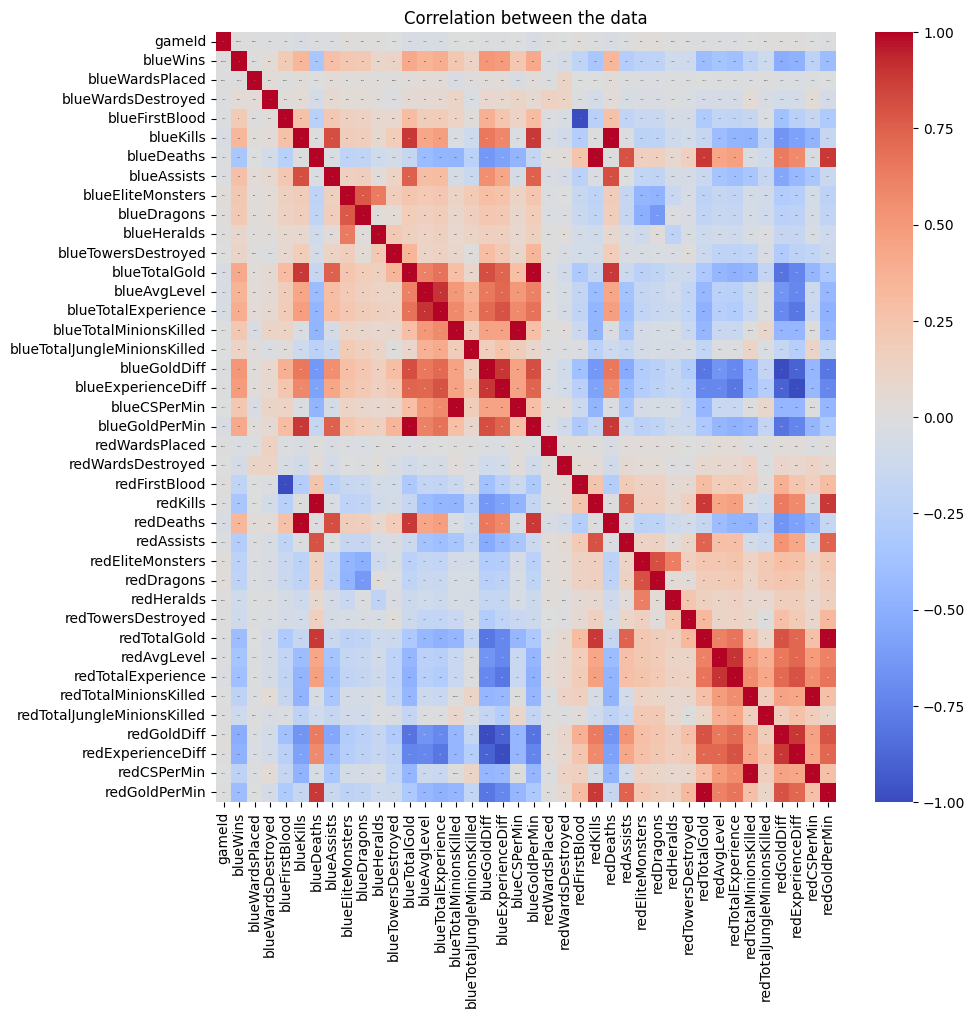

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(diamond.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 0}).set(
    title = "Correlation between the data")
plt.xticks(rotation=90)
plt.show()

In [12]:
diamond.columns
# 상관관계 너무 높은거 빼고 해보자
# diamond.drop(['redFirstBlood, redKills, redDeaths, '])

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [15]:

c = diamond.corr()
c[c > 0.8]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueWins,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueWardsPlaced,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueWardsDestroyed,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueFirstBlood,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueKills,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.813667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueDeaths,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,0.885728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885728
blueAssists,NaN,NaN,NaN,NaN,NaN,0.813667,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueEliteMonsters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueDragons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
diamond.corrwith(diamond.blueWins)
# 와드와는 큰 상관관계가 없고, KDA, 골드차이와 경험치 차이와 상관관계가 크다.

gameId                          0.000985
blueWins                        1.000000
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueFirstBlood                  0.201769
blueKills                       0.337358
blueDeaths                     -0.339297
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalGold                   0.417213
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueTotalMinionsKilled          0.224909
blueTotalJungleMinionsKilled    0.131445
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueCSPerMin                    0.224909
blueGoldPerMin                  0.417213
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redFirstBlood                  -0.201769
redKills        

In [ ]:
diamond.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [ ]:
# 10분에 와드 100개 이상을 박았는데 게임을 이긴게 무려 100판이 넘는다...어떻게 한거지....
print(diamond[(diamond['blueWardsPlaced'] > 100) & (diamond['blueWins'] == 1)][['blueWins', 'blueWardsPlaced']].count())
print(diamond[(diamond['redWardsPlaced'] > 100) & (diamond['blueWins'] == 0)][['blueWins', 'redWardsPlaced']].count())

blueWins           49
blueWardsPlaced    49
dtype: int64
blueWins          55
redWardsPlaced    55
dtype: int64


In [ ]:
# dataframe에서 관련도가 0.1 이상인것만 추출
import numpy as np
cor = (np.abs(diamond.corrwith(diamond['blueWins'])) > 0.1) | (np.abs(diamond.corrwith(diamond['blueWins'])) < -0.1)
d_cor = diamond[diamond.columns[cor.values]]

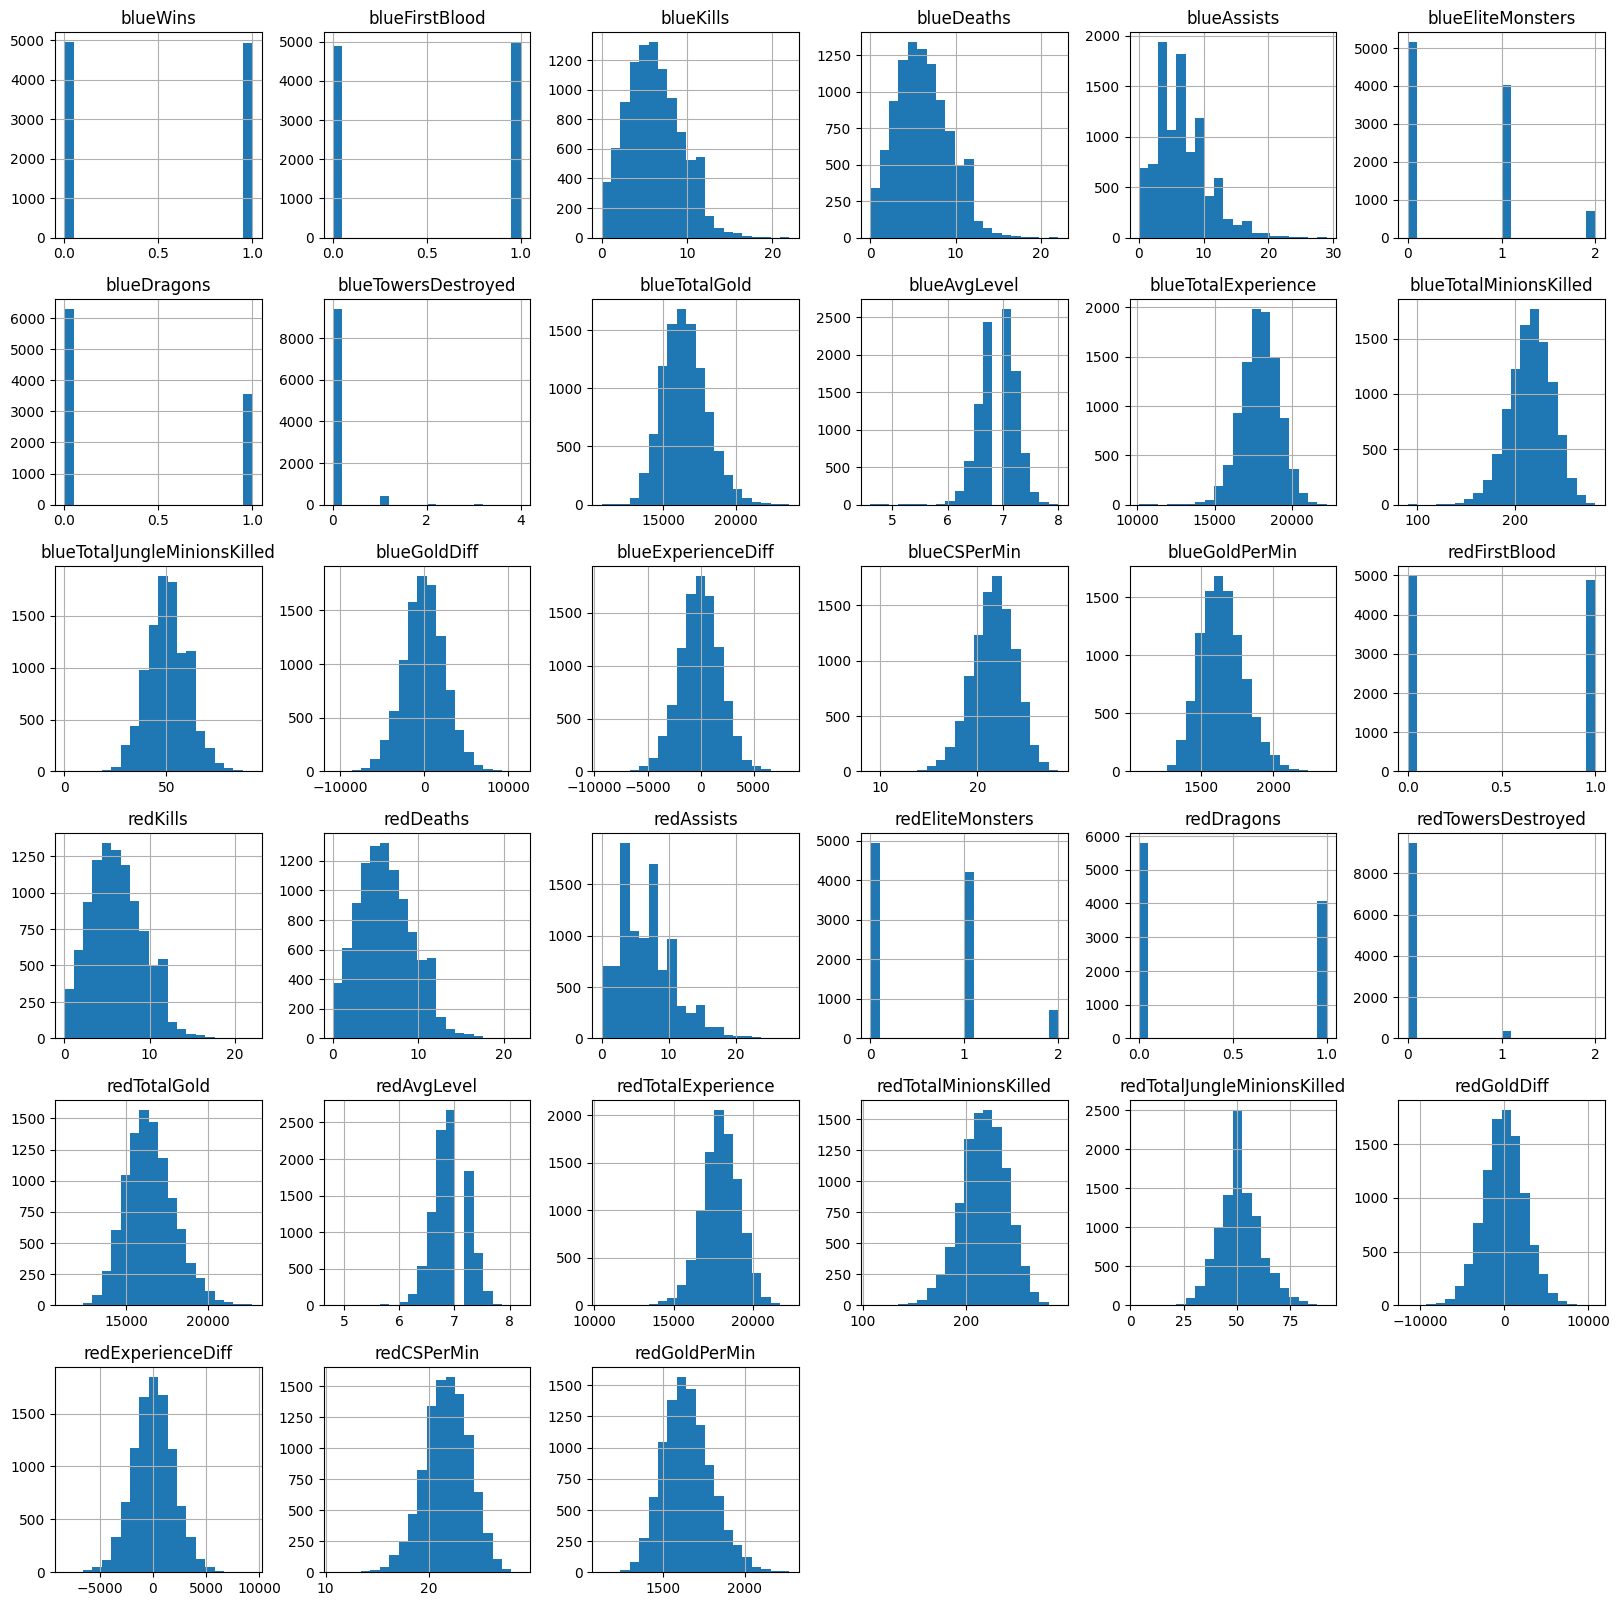

In [ ]:
d_cor.hist(figsize=(20,20), bins = 20)
plt.show()

In [ ]:
a = pd.DataFrame(d_cor.describe().loc['75%'], columns = ['75%'])
b = pd.DataFrame(d_cor.describe().loc['max'], columns = ['max'])
c = pd.DataFrame(d_cor.describe().loc['mean'], columns = ['mean'])
d = pd.concat([a, b, c], axis = 1)
d

,75%,max,mean
blueWins,1.00,1.0,0.499038
blueFirstBlood,1.00,1.0,0.504808
blueKills,8.00,22.0,6.183925
blueDeaths,8.00,22.0,6.137666
blueAssists,9.00,29.0,6.645106
blueEliteMonsters,1.00,2.0,0.549954
blueDragons,1.00,1.0,0.361980
blueTowersDestroyed,0.00,4.0,0.051422
blueTotalGold,17459.00,23701.0,16503.455512
blueAvgLevel,7.20,8.0,6.916004


## 이상치 시각화

In [ ]:
import plotly.express as px
fig = px.box(d_cor.iloc[:, 22:])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.express as px
fig = px.box(d_cor.iloc[:, 11:22])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.express as px
fig = px.box(d_cor.iloc[:, :11])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## 이상치 정제

In [ ]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return upper_bound, lower_bound


In [ ]:
d_copy = d_cor.copy()
for col in d_copy.columns:
    up, lw = outliers_iqr(d_copy[[col]])
    condition = (d_copy[col] > up) | (d_copy[col] < lw)
    d_copy.loc[condition, col] = np.NaN

In [ ]:
d_copy = d_copy.dropna()
d_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8180 entries, 0 to 9878
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      8180 non-null   float64
 1   blueFirstBlood                8180 non-null   float64
 2   blueKills                     8180 non-null   float64
 3   blueDeaths                    8180 non-null   float64
 4   blueAssists                   8180 non-null   float64
 5   blueEliteMonsters             8180 non-null   float64
 6   blueDragons                   8180 non-null   float64
 7   blueTowersDestroyed           8180 non-null   float64
 8   blueTotalGold                 8180 non-null   float64
 9   blueAvgLevel                  8180 non-null   float64
 10  blueTotalExperience           8180 non-null   float64
 11  blueTotalMinionsKilled        8180 non-null   float64
 12  blueTotalJungleMinionsKilled  8180 non-null   float64
 13  blu

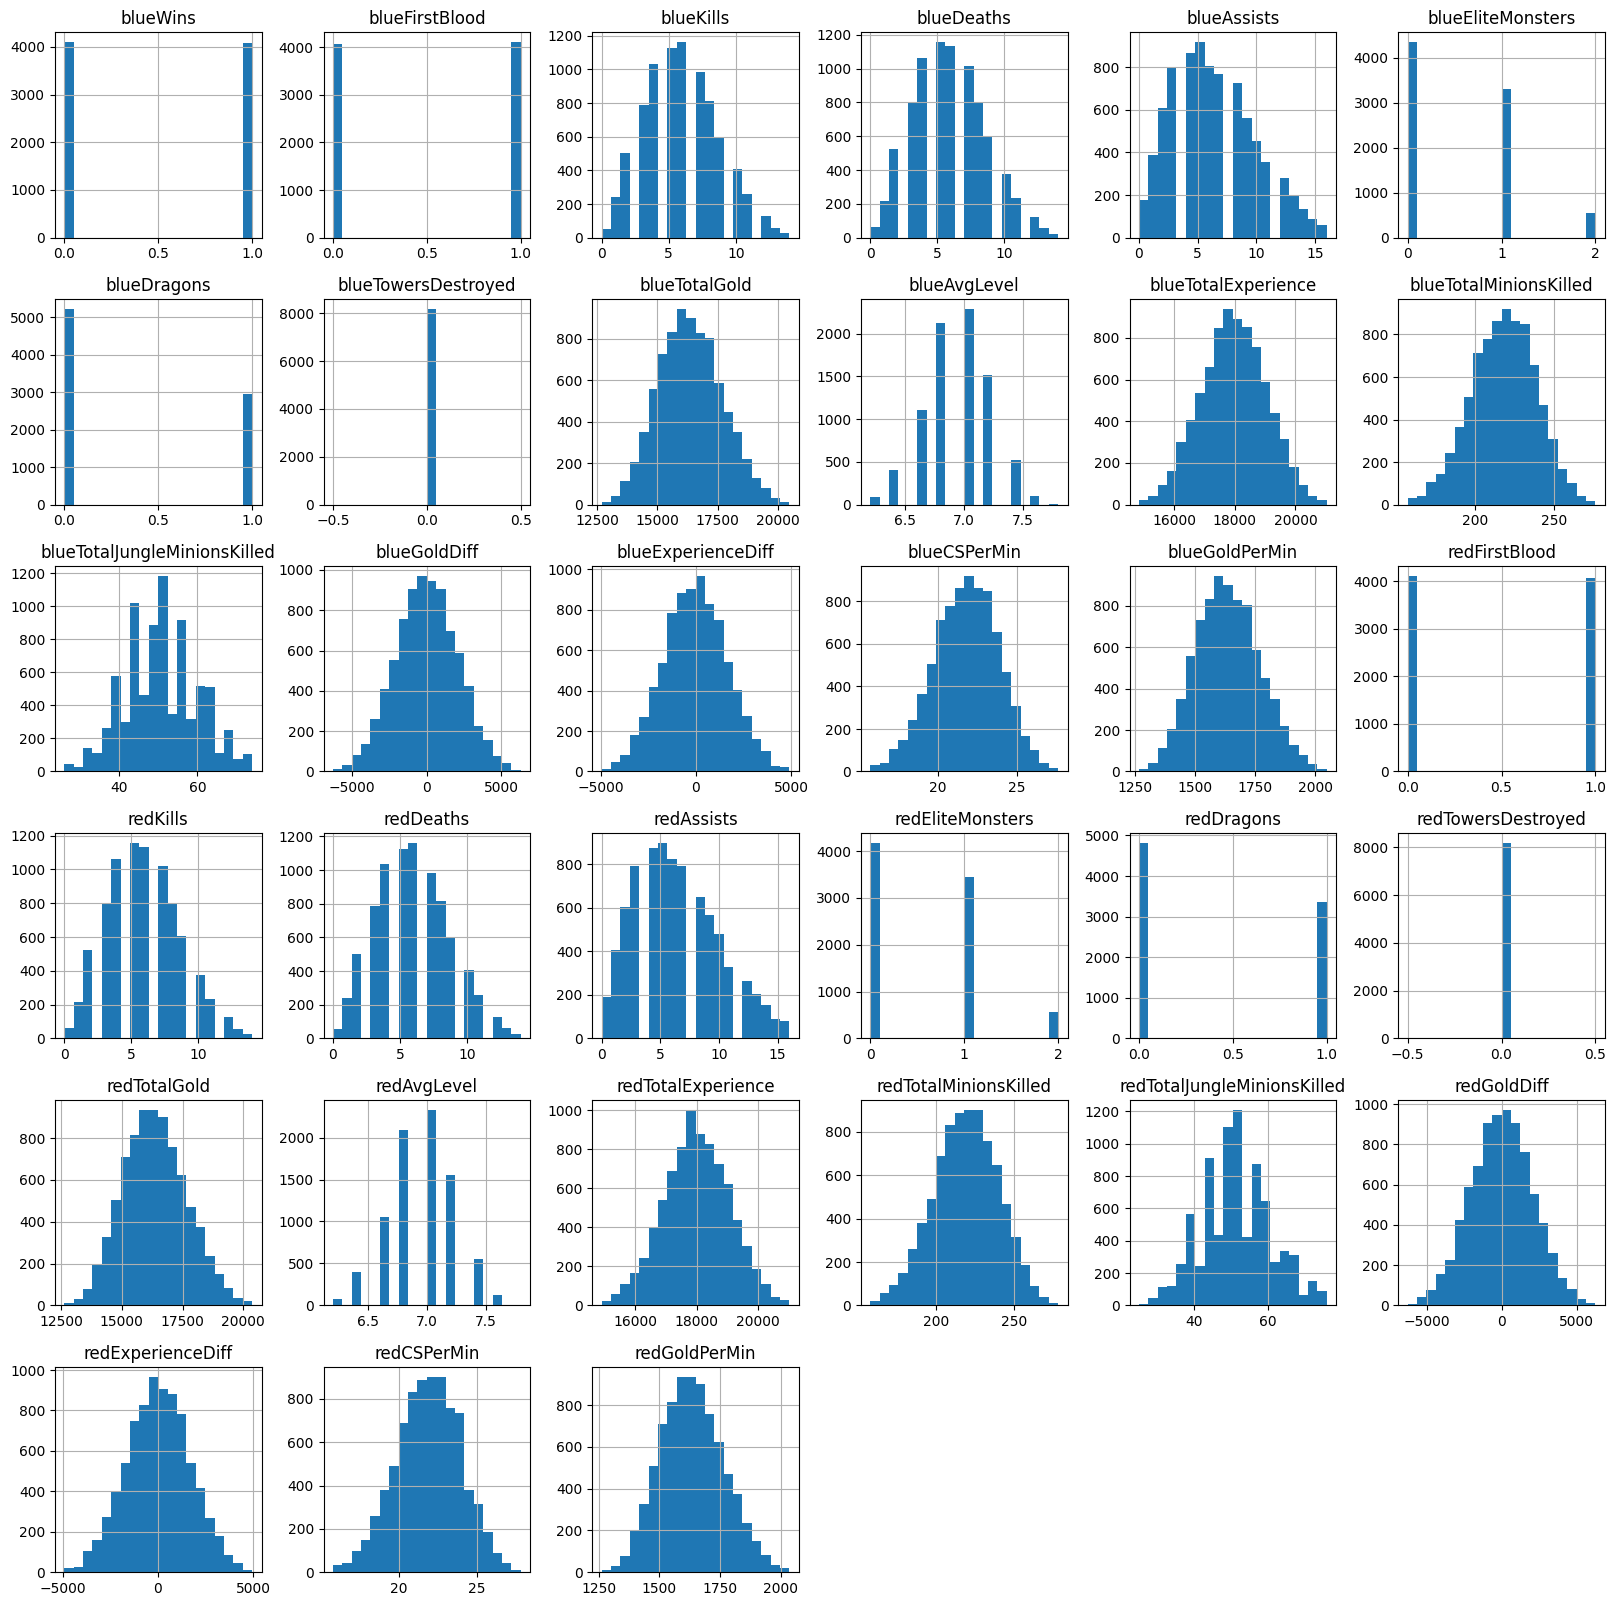

In [ ]:

d_copy.hist(figsize=(20,20), bins = 20)
plt.show()

In [ ]:
# blueTowersDestroyed, redTowersDestroyed는 모두 0으로 되어서 drop
d_copy = d_copy.drop(['blueTowersDestroyed', 'redTowersDestroyed'], axis = 1)


In [ ]:
d_copy.columns

Index(['blueWins', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## 스케일링
여러 가지 시도해 보았으나 standard가 가장 성능이 좋았다.

In [ ]:
# d_copy.to_csv('/content/drive/MyDrive/dataset/Ml_Challenge/model/d_copy20230727')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

d_copy = pd.read_csv('/content/drive/MyDrive/dataset/Ml_Challenge/model/d_copy20230727')

y_data = d_copy['blueWins']
x_data = d_copy.drop('blueWins', axis = 1)
# 자르기
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 55, test_size = 0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
# scale할 index 고르기
train_scale = x_train[x_train.columns[x_train.max() > 3]]
test_scale = x_test[x_test.columns[x_test.max() > 3]]

#scale
scaler = StandardScaler()
scaler.fit(train_scale)
# train, test 각각 transform
train_scale = pd.DataFrame(scaler.transform(train_scale), columns = train_scale.columns)
test_scale = pd.DataFrame(scaler.transform(test_scale), columns = test_scale.columns)


In [ ]:
y_data = d_copy['blueWins']
x_data = d_copy.drop('blueWins', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 55, test_size = 0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
train_scale = x_train[x_train.columns[x_train.max() > 3]]
test_scale = x_test[x_test.columns[x_test.max() > 3]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_scale)
train_scale = pd.DataFrame(scaler.transform(train_scale), columns = train_scale.columns)
test_scale = pd.DataFrame(scaler.transform(test_scale), columns = test_scale.columns)
type(train_scale), type(test_scale)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
for clms in train_scale.columns:
    x_train[clms] = train_scale[clms]
    x_test[clms] = test_scale[clms]

In [ ]:
x_train

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,...,redDragons,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.0,4.0,3.0,5.0,0.0,0.0,15450.0,7.0,17766.0,202.0,...,1.0,15138.0,7.2,17733.0,243.0,52.0,-312.0,-33.0,24.3,1513.8
1,1.0,8.0,9.0,6.0,0.0,0.0,17424.0,7.2,18146.0,224.0,...,0.0,18042.0,7.0,18815.0,223.0,57.0,618.0,669.0,22.3,1804.2
2,0.0,3.0,7.0,4.0,1.0,0.0,15797.0,6.8,18289.0,226.0,...,1.0,17031.0,7.0,18263.0,222.0,55.0,1234.0,-26.0,22.2,1703.1
3,1.0,7.0,7.0,6.0,0.0,0.0,16313.0,6.8,16697.0,201.0,...,0.0,17562.0,7.4,19775.0,228.0,59.0,1249.0,3078.0,22.8,1756.2
4,1.0,4.0,3.0,7.0,0.0,0.0,15989.0,6.8,17682.0,254.0,...,1.0,16066.0,7.0,19197.0,250.0,74.0,77.0,1515.0,25.0,1606.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,1.0,2.0,3.0,2.0,2.0,1.0,15723.0,7.2,19631.0,246.0,...,0.0,15584.0,7.4,19371.0,253.0,61.0,-139.0,-260.0,25.3,1558.4
5722,1.0,10.0,2.0,12.0,1.0,1.0,19035.0,7.4,19265.0,239.0,...,0.0,13570.0,6.4,15773.0,190.0,32.0,-5465.0,-3492.0,19.0,1357.0
5723,1.0,5.0,6.0,6.0,0.0,0.0,16126.0,7.0,18201.0,217.0,...,1.0,16065.0,6.8,17081.0,203.0,52.0,-61.0,-1120.0,20.3,1606.5
5724,1.0,4.0,4.0,3.0,0.0,0.0,16175.0,6.8,17305.0,253.0,...,0.0,15491.0,7.0,17779.0,232.0,46.0,-684.0,474.0,23.2,1549.1


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5726, 30), (2454, 30), (5726,), (2454,))

array([[<Axes: title={'center': 'blueFirstBlood'}>,
        <Axes: title={'center': 'blueKills'}>,
        <Axes: title={'center': 'blueDeaths'}>,
        <Axes: title={'center': 'blueAssists'}>,
        <Axes: title={'center': 'blueEliteMonsters'}>],
       [<Axes: title={'center': 'blueDragons'}>,
        <Axes: title={'center': 'blueTotalGold'}>,
        <Axes: title={'center': 'blueAvgLevel'}>,
        <Axes: title={'center': 'blueTotalExperience'}>,
        <Axes: title={'center': 'blueTotalMinionsKilled'}>],
       [<Axes: title={'center': 'blueTotalJungleMinionsKilled'}>,
        <Axes: title={'center': 'blueGoldDiff'}>,
        <Axes: title={'center': 'blueExperienceDiff'}>,
        <Axes: title={'center': 'blueCSPerMin'}>,
        <Axes: title={'center': 'blueGoldPerMin'}>],
       [<Axes: title={'center': 'redFirstBlood'}>,
        <Axes: title={'center': 'redKills'}>,
        <Axes: title={'center': 'redDeaths'}>,
        <Axes: title={'center': 'redAssists'}>,
        <Axes

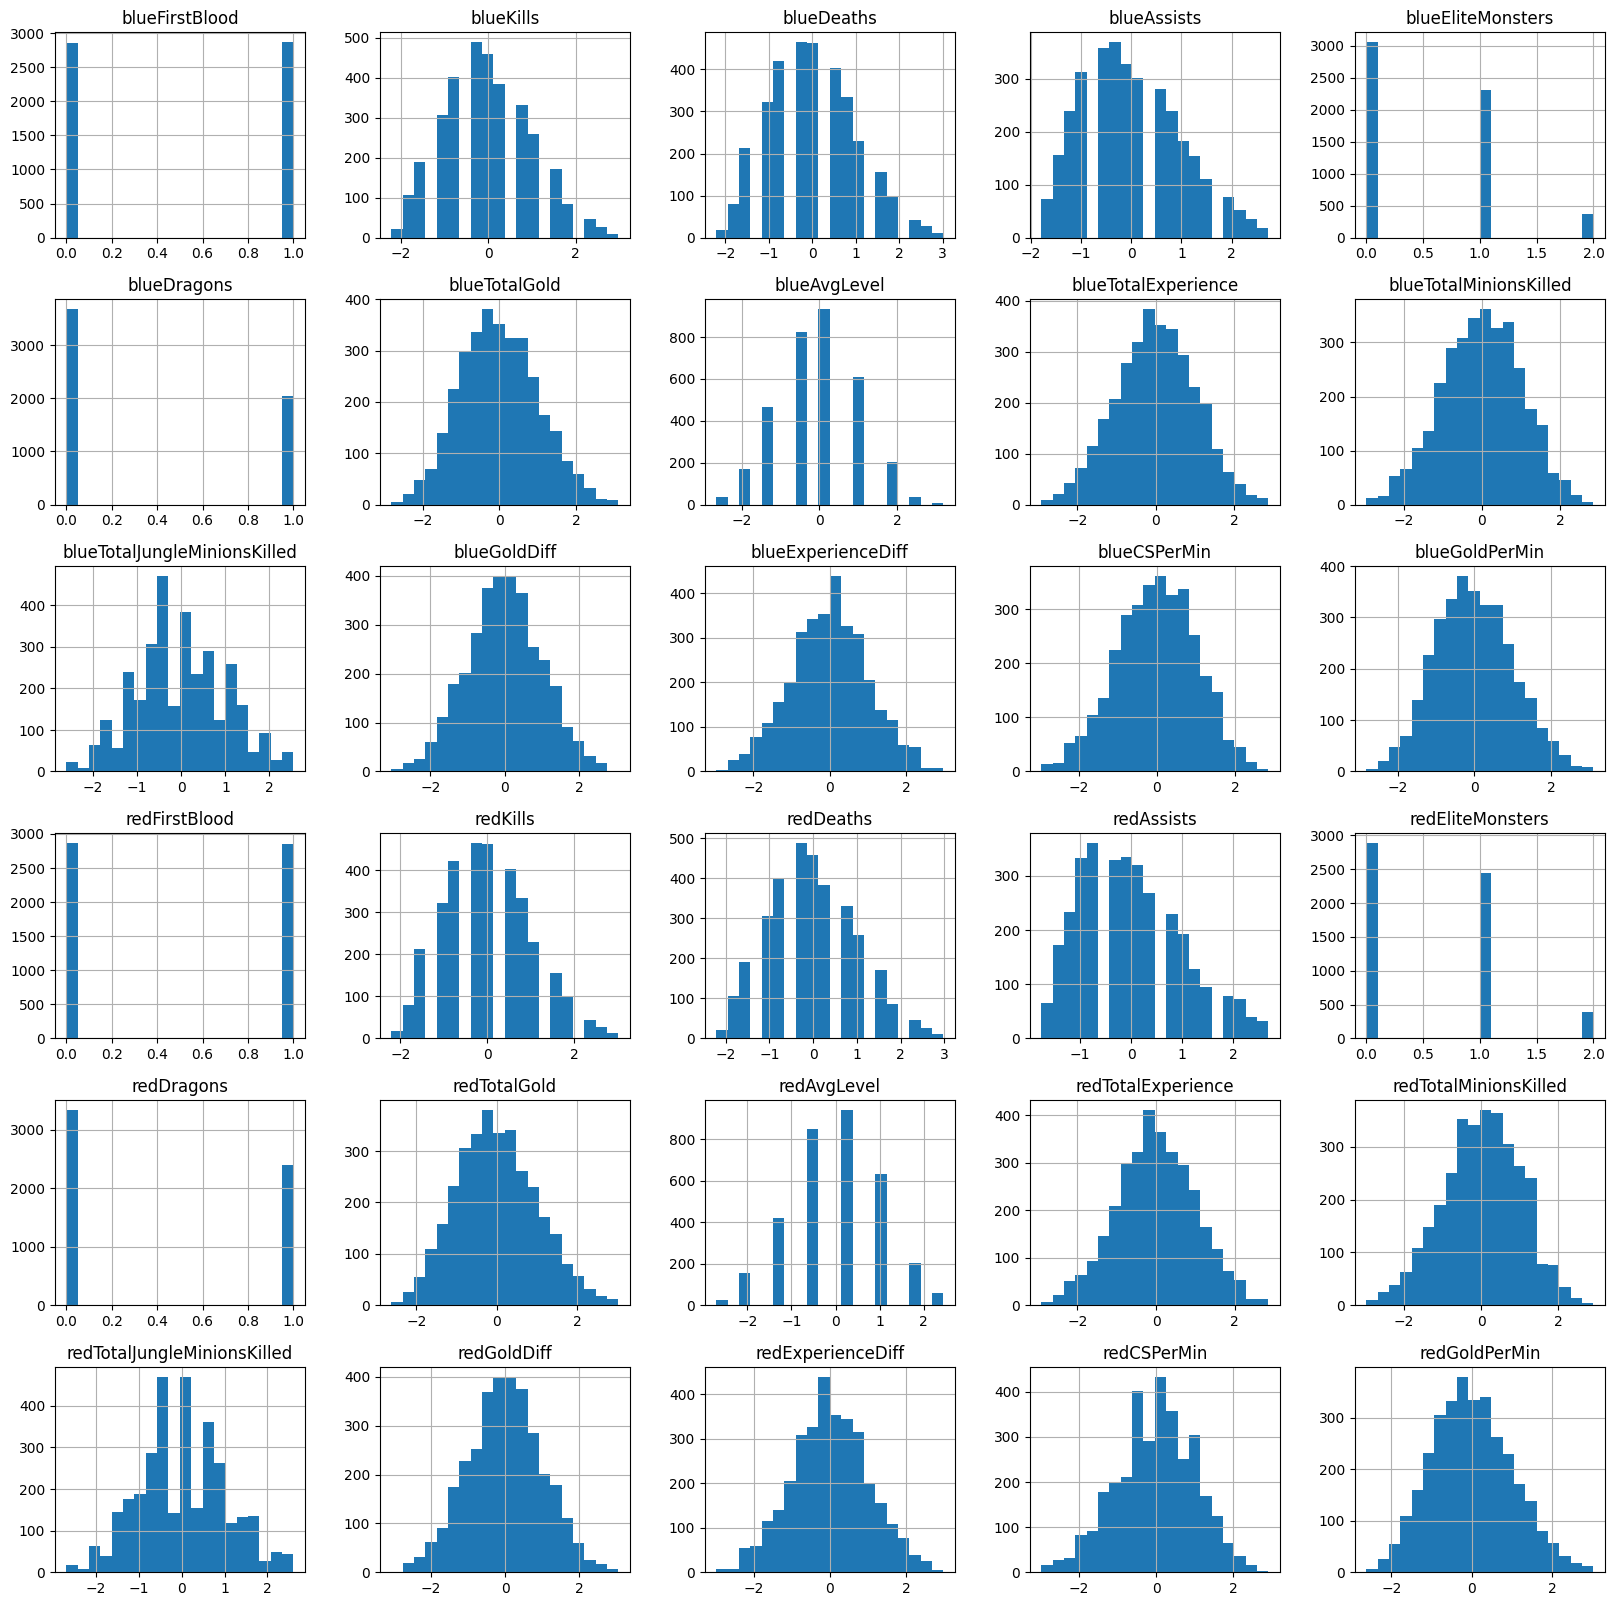

In [ ]:
x_train.hist(figsize=(20,20), bins = 20)

## 모델링!


### AdaBoostClassifier
여러 가지 시도해 보았으나 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, n_estimators=100) 가 가장 성능이 좋았다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier()


ada_param_grid = {"n_estimators" :[30, 50, 70, 100],
                  "algorithm" : ["SAMME"],
              "learning_rate":  [0.2]}
adagrid = GridSearchCV(model, param_grid = ada_param_grid, cv=3, refit = True ,  scoring='accuracy')
adagrid.fit(x_train[x_train.columns], y_train)
pd.DataFrame(adagrid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]


,params,mean_test_score,rank_test_score
0,"{'algorithm': 'SAMME', 'learning_rate': 0.2, '...",0.712190,3
1,"{'algorithm': 'SAMME', 'learning_rate': 0.2, '...",0.712540,2
2,"{'algorithm': 'SAMME', 'learning_rate': 0.2, '...",0.712016,4
3,"{'algorithm': 'SAMME', 'learning_rate': 0.2, '...",0.713936,1


In [ ]:
adamodel = adagrid.best_estimator_
adamodel

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, n_estimators=100)

In [ ]:
ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, n_estimators=100)
ada.fit(x_train, y_train)
print(ada.score(x_test, y_test))
print(ada.score(x_train, y_train))

0.7180114099429503
0.7146349982535801


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, adamodel.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72      1232
         1.0       0.73      0.70      0.71      1222

    accuracy                           0.72      2454
   macro avg       0.72      0.72      0.72      2454
weighted avg       0.72      0.72      0.72      2454



### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(100, max_depth = 1, max_features = 2)


ada_param_grid = {"n_estimators" :[100, 200],
                  "max_depth" : [30, 40, 50],
              "max_features":  [15, 25, 30]}
grid = GridSearchCV(model, param_grid = ada_param_grid, cv=3, refit = True ,  scoring='accuracy')

grid.fit(x_train[x_train.columns], y_train)
pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 30, 'max_features': 15, 'n_estim...",0.697171,1,0.693033,0.699319,0.699161
1,"{'max_depth': 30, 'max_features': 15, 'n_estim...",0.692281,16,0.694081,0.691985,0.690776
2,"{'max_depth': 30, 'max_features': 25, 'n_estim...",0.690010,17,0.689890,0.693033,0.687107
3,"{'max_depth': 30, 'max_features': 25, 'n_estim...",0.692979,13,0.700891,0.684652,0.693396
4,"{'max_depth': 30, 'max_features': 30, 'n_estim...",0.694551,6,0.695128,0.693033,0.695493
5,"{'max_depth': 30, 'max_features': 30, 'n_estim...",0.694376,8,0.699843,0.689366,0.693920
6,"{'max_depth': 40, 'max_features': 15, 'n_estim...",0.693154,10,0.694605,0.691985,0.692872
7,"{'max_depth': 40, 'max_features': 15, 'n_estim...",0.696297,3,0.701414,0.695652,0.691824
8,"{'max_depth': 40, 'max_features': 25, 'n_estim...",0.689662,18,0.690414,0.681509,0.697065
9,"{'max_depth': 40, 'max_features': 25, 'n_estim...",0.696471,2,0.706653,0.690938,0.691824


In [ ]:
# model save
import joblib
# joblib.dump(adagrid, '/content/drive/MyDrive/dataset/Ml_Challenge/adaGridSearchCV230727.pkl')

#읽어 올 땐
adamodel = joblib.load("/content/drive/MyDrive/dataset/Ml_Challenge/adaGridSearchCV230727.pkl")

['/content/drive/MyDrive/dataset/Ml_Challenge/adaGridSearchCV230727.pkl']

In [ ]:

import joblib
tmp = joblib.load("/content/drive/MyDrive/dataset/Ml_Challenge/adaGridSearchCV230727.pkl")

from sklearn.metrics import classification_report
print(classification_report(y_test, tmp.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72      1232
         1.0       0.73      0.70      0.71      1222

    accuracy                           0.72      2454
   macro avg       0.72      0.72      0.72      2454
weighted avg       0.72      0.72      0.72      2454



In [ ]:
tmp.predict_proba(x_test)

array([[0.5361882 , 0.4638118 ],
       [0.50183521, 0.49816479],
       [0.36283475, 0.63716525],
       ...,
       [0.42936469, 0.57063531],
       [0.66707998, 0.33292002],
       [0.55297437, 0.44702563]])

In [ ]:
ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, n_estimators=100)
ada.fit(x_train, y_train)
print(ada.score(x_test, y_test))
print(ada.score(x_train, y_train))

0.7180114099429503
0.7146349982535801
